# Real Housing Data Train
from : https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

The data is in the file data, with housing.data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'data/housing.data'
df = pd.read_csv(path, header=None, sep='\s+')
data = np.array(df)

# n:rows
# m:coloums
y_data = data[:,-1]
x_data = data[:,0:13]
n,m = x_data.shape
y_data.shape
n,m

(506, 13)

In [3]:
def Linear_model(x, w, b):
    '''
    Input:
        w : Integar, representing weight 1 * 13
        x : NumpyArray, repersenting Size of the house 506 * 13
    Output:
        y_hat : NumpyArray, prediction of Price, based on y = w * x
    '''  
    n,m = x.shape
    f_wb = np.zeros(n)
    for i in range(n):
        f_wb_i = np.dot(x[i,:],w) + b 
        f_wb[i] = f_wb_i

    y_hat = f_wb
        
    return y_hat

# Set initial w value
w_init = np.zeros(m)
b_init = 0
y_hat = Linear_model(x_data, w_init,b_init)


In [4]:
x_data[:,12].shape
n,m = x_data.shape
m

13

In [5]:
#Cost Function
def Cost_function(x, y, w, b):
    '''
    Input:
        w : Int, representing weight
        b : Int, Bias
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        Cost : Int
    '''  

    m = y.shape[0]
    cost = 0
    f_wb = Linear_model(x, w, b)
    
    #TODO:
    val = (f_wb - y) ** 2
    val = np.sum(val)
    cost += val

    cost /= 2*m

    
    return cost
        
cost = Cost_function(x_data, y_data, w_init, b_init)
cost 

296.0734584980237

In [6]:
#Gradient Descent
def gradient_function(x, y, w, b):
    '''
    Input:
        w : Int, representing weight
        b : Int, Bias
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        dj_dw : Float
        dj_db : Float
    '''  
    n,m = x.shape
    dj_dw = np.zeros(m)
    dj_db = 0.0
    f_wb = Linear_model(x, w, b)
    
    #TODO:
    val = f_wb - y
    for i in range(m):
        dj_dw[i] = np.dot(val, x[:,i])
    
    
    dj_db = np.sum(val)
    

    dj_dw /= m
    dj_db /= m
    
    return dj_dw,dj_db    

In [7]:
def Gradient_Descent(x, y , w_init, b_init, lr, iteration):
    '''
    Input:
        w_init : Int, initial weight
        b_init : Int, initial bias
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house

    Output:
        cost_history: List, recording cost
        w_history: List, recording weight
        b_history: List, recording bias
    '''  
    #For drawing figure, do not care
    cost_history = []
    w_history = []
    b_history = []
    #Start Here
    w = w_init
    b = b_init
    
    for num in range(iteration):

        
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - dj_dw * lr
        b = b - dj_db * lr

        #For drawing figure, do not care
        cost = Cost_function(x,y,w,b)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)
        if (num % 10000 == 0):
            print(f"Iter:{num:4}, Cost : {cost:0.4e}")
                  

    return w,b,cost,w_history,cost_history,b_history

In [8]:
#Hyperparametres
w_init = np.zeros(m)
b_init = 0
lr = 1 * 10 ** (-7)
iteration  = 100000
w_new,b_new,cost_new,w_history,cost_history,b_history = Gradient_Descent(x_data,y_data,w_init,b_init,lr,iteration)

Iter:   0, Cost : 7.4846e+01
Iter:10000, Cost : 2.5805e+01
Iter:20000, Cost : 2.3475e+01
Iter:30000, Cost : 2.2388e+01
Iter:40000, Cost : 2.1662e+01
Iter:50000, Cost : 2.1092e+01
Iter:60000, Cost : 2.0604e+01
Iter:70000, Cost : 2.0166e+01
Iter:80000, Cost : 1.9761e+01
Iter:90000, Cost : 1.9383e+01


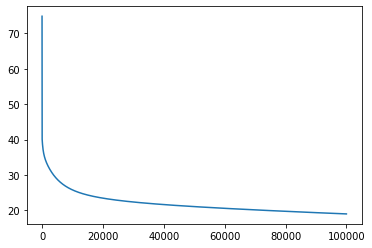

In [9]:
plt.plot(cost_history)

In [10]:
y_predict = Linear_model(x_data,w_new,b_new)
print(y_predict-y_data)


[  4.50412828   4.42580526  -5.26288978  -4.17464988  -7.79517104
  -0.92841078  -1.3552571   -7.86773409  -6.43889546   0.42825978
   3.2019518    3.44909826  -5.57584274   5.32989319   7.8987664
   4.99295273   0.66446377   4.89543895  -2.76103148   5.48281903
   4.4651367    4.26933689   5.41213114   5.42570214   6.73641007
   4.79383706   5.94103196   4.31358978   7.40505438   4.87780925
   3.54031863  10.70806803  -4.80881417   6.54732977   2.65098149
   5.94421992   2.24858661   1.90323393  -3.81571032   1.57842168
  -0.59707153  -3.84019417  -3.91363731  -4.27054298   0.3395892
   0.80822453  -2.87119638   1.91282425  -5.26501129  -1.60607052
   0.80284085   4.94755453   0.49256236  -1.1207588    6.33561883
  -1.03533643   7.15884402   3.95454156   2.88011482   6.31226383
   5.53110765   9.70188912   8.33416492   1.45615178  -5.00427921
   6.7237222    6.92957488  -0.13473907   1.56056936   1.51842696
  -2.8466192   -2.6722097   -0.75153862  -3.15272981  -3.3973612
   0.92503427

Clearly we can see that the Linear Regression Model, even on the training set, can't expect a very high fitting because of the model himself, we can also change the certain model, for example using polynomial equations.